<a href="https://colab.research.google.com/github/DanielaOrovw/Topic-modelling/blob/master/Topic_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Topic Modelling: Natural Language Processing**


### TOPIC MODEL

This is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents. A document typically concerns multiple topics in different proportions; thus, in a document that is 10% about cats and 90% about dogs, there would probably be about 9 times more dog words than cat words. The "topics" produced by topic modeling techniques are clusters of similar words. A topic model captures this intuition in a mathematical framework, which allows examining a set of documents and discovering, based on the statistics of the words in each, what the topics might be and what each document's balance of topics is.

Import the needed packages

In [0]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.decomposition import NMF
import numpy as np
import pickle 
import warnings  
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

import nltk 
# from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
# from nltk.stem import PorterStemmer
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

import json
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt

from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
# Run in python console
import nltk; nltk.download('stopwords')
%matplotlib inline


# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)


import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Daniela
[nltk_data]     Orovwiroro\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\Daniela
[nltk_data]     Orovwiroro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Loading BokehJS ...

[nltk_data] Downloading package stopwords to C:\Users\Daniela
[nltk_data]     Orovwiroro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1. Data Preparation and cleaning

In [0]:
from sklearn.datasets import fetch_20newsgroups

In [0]:
news = fetch_20newsgroups(subset='all')

In [0]:
news.target

array([10,  3, 17, ...,  3,  1,  7])

In [0]:
# extract only the relevant column for this project
df = df.loc[:,['description']]

In [0]:
# Create a doc id for merging the results back to the original file 
df.insert(0, 'Doc_Id', range(0, 0 + len(df)))
df.head()

,Doc_Id,description
0,0,xxxxxxbilis xxxxxx Technologies is pleased to ...
1,1,The PHX METEOROLOGICAL DATA product contains p...
2,2,ASC has developed non-scanning 3D xxxxxxTM ima...
3,3,xxxxxxNET inversion code provides aerosoloptic...
4,4,This proposal addresses the concept of Collabo...


In [0]:
# Get the word count for each document
df['word_count'] = df['description'].apply(lambda x: len(str(x).split(" ")))
df.head()

,Doc_Id,description,word_count
0,0,xxxxxxbilis xxxxxx Technologies is pleased to ...,104
1,1,The PHX METEOROLOGICAL DATA product contains p...,60
2,2,ASC has developed non-scanning 3D xxxxxxTM ima...,187
3,3,xxxxxxNET inversion code provides aerosoloptic...,80
4,4,This proposal addresses the concept of Collabo...,201


In [0]:
pip install enstop

     |████████████████████████████████| 3.6MB 8.9MB/s 
     |████████████████████████████████| 778kB 54.7MB/s 
     |████████████████████████████████| 4.9MB 56.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.23-cp36-cp36m-linux_x86_64.whl size=2332183 sha256=0ac943df84edbee1b6dbf303fd4fb0839e51fb7b57d75d630e10ae552511fe47
  Stored in directory: /root/.cache/pip/wheels/1e/2a/69/0cdd5414624312666718f7526b0ab39cad65cea1c1b3892768
Successfully built hdbscan
  Created wheel for enstop: filename=enstop-0.1.3-cp36-none-any.whl size=18293 sha256=a2f361a736d8dbbfed11d493b78759a72f0de292021437f2d235ef50d7afd70d
  Stored in directory: /root/.cache/pip/wheels/c5/3b/16/789793c9d73b247c07e00d5f56f7aca13b49ed6dc99171d11e
Successfully built enstop
  Found existing installation: numba 0.40.1
    Uninstalling numba-0.40.1:
      Successfully uninstalled numba-0.40.1
  Fo

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from enstop import EnsembleTopics, PLSA
data = CountVectorizer(min_df=5, stop_words='english').fit_transform(news.data)


In [0]:
data

<18846x34880 sparse matrix of type '<class 'numpy.int64'>'
	with 1939023 stored elements in Compressed Sparse Row format>

In [0]:
%%time
lda_model = LatentDirichletAllocation(n_components=20).fit(data)

CPU times: user 3min 55s, sys: 2min 24s, total: 6min 20s
Wall time: 3min 24s


In [0]:
# Removing unwanted characters
import re
df['description'] = df['description'].str.replace('x', '')
df['description'] = df['description'].str.replace('X', '')
df['description'] = df['description'].str.replace('{', '')
df['description'] = df['description'].str.replace('}', '')
df['description'] = df['description'].str.replace('/', '')
df.head()

,Doc_Id,description,word_count
0,0,bilis Technologies is pleased to propose an i...,104
1,1,The PH METEOROLOGICAL DATA product contains pr...,60
2,2,ASC has developed non-scanning 3D TM imagers f...,187
3,3,NET inversion code provides aerosoloptical pro...,80
4,4,This proposal addresses the concept of Collabo...,201


In [0]:
# convert the data description to string
df['description']=df['description'].apply(str)

In [0]:
# Top 20 most frequent words
freq = pd.Series(' '.join(df['description']).split()).value_counts()[:20]
freq

the     175826
and     134942
of      116923
to       86622
a        66750
in       52741
for      52722
is       38072
The      38020
will     30379
data     27565
with     25721
be       24651
are      23925
that     22507
on       22209
from     21384
as       19466
by       17430
at       15915
dtype: int64

In [0]:
# Work with only nouns. Use NLTK to get only nouns in the corpus
import nltk
nltk.download('punkt')
def nouns(text):
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)]
    return ' '.join(all_nouns)

[nltk_data] Downloading package punkt to C:\Users\Daniela
[nltk_data]     Orovwiroro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
# Create a column that shows the nouns 
df['data_nouns'] = pd.DataFrame(df.description.apply(nouns))
df.head()

,Doc_Id,description,word_count,data_nouns
0,0,bilis Technologies is pleased to propose an i...,104,bilis Technologies motor propulsion solution g...
1,1,The PH METEOROLOGICAL DATA product contains pr...,60,PH METEOROLOGICAL DATA product Digital Numbers...
2,2,ASC has developed non-scanning 3D TM imagers f...,187,ASC TM imagers UAS awareness landing technolog...
3,3,NET inversion code provides aerosoloptical pro...,80,inversion code properties column diffuse radia...
4,4,This proposal addresses the concept of Collabo...,201,proposal concept Collaborative Outbound Tai in...


In [0]:
# Further cleaning, removing stopwords, lemmatizing
import re
temp =[]
my_stop_words = text.ENGLISH_STOP_WORDS

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

for sentence in df['data_nouns']:
    sentence = sentence.lower()
    cleaner = re.compile('<.*?>')
    sentence = re.sub(cleaner, ' ', sentence)  # Remove html tags
    sentence = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    sentence = re.sub(r'[.|,|)|(|\|/]',r' ',sentence) # removing puntuations
    
    words = [lemmatizer.lemmatize(word) for word in sentence.split() if word not in my_stop_words] # removing stopwords and lemm
    temp.append(words)
    
final_X = temp

In [0]:
sent = []
for row in final_X:
    sequ = ''
    for word in row:
        sequ = sequ + ' ' + word
    sent.append(sequ)
final_X = sent
# remove unwanted characters, numbers and symbols 
df['cleaned'] = final_X
df.head()

,Doc_Id,description,word_count,data_nouns,cleaned
0,0,bilis Technologies is pleased to propose an i...,104,bilis Technologies motor propulsion solution g...,bilis technology motor propulsion solution gr...
1,1,The PH METEOROLOGICAL DATA product contains pr...,60,PH METEOROLOGICAL DATA product Digital Numbers...,ph meteorological data product digital number...
2,2,ASC has developed non-scanning 3D TM imagers f...,187,ASC TM imagers UAS awareness landing technolog...,asc tm imagers uas awareness landing technolo...
3,3,NET inversion code provides aerosoloptical pro...,80,inversion code properties column diffuse radia...,inversion code property column diffuse radiat...
4,4,This proposal addresses the concept of Collabo...,201,proposal concept Collaborative Outbound Tai in...,proposal concept collaborative outbound tai i...


In [0]:
# let us see the top 20 again after cleaning
freq_ = pd.Series(' '.join(df['cleaned']).split()).value_counts()[:20]
freq_

data           30791
product        10408
mission        10351
technology      9307
set             7429
design          7351
surface         7092
observation     6498
temperature     6435
system          6258
instrument      6221
time            6169
space           5876
measurement     5874
analysis        5797
model           5649
power           5488
file            5449
performance     5409
material        5385
dtype: int64

## 2. Data Visualization

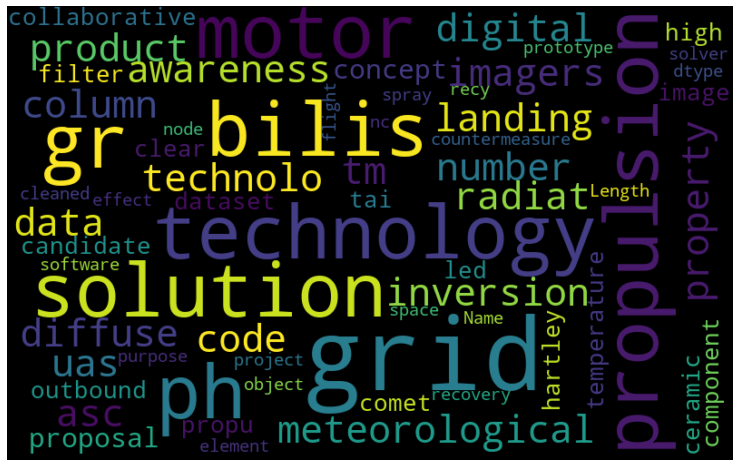

In [0]:
#Wordcloud
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(df['cleaned'])) 
plt.figure(1,figsize=(13, 10))
fig=plt.figure(1)
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()
fig.savefig('wordcloud')

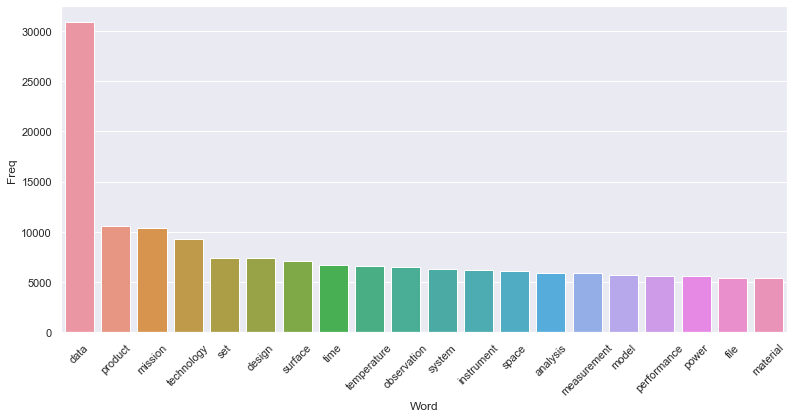

In [0]:
#Use CountVectorizer to get bigrams to visualize
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_df = 0.95, min_df = 2, stop_words= 'english', max_features=10000, ngram_range=(1,3))
X = cv.fit_transform(df['cleaned'])
# Most frequently occuring words
def get_top_n_words(corpus,n=None):
    vec = CountVectorizer().fit(df['cleaned'])
    bag_of_words=vec.transform(df['cleaned'])
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word , idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Convert most freq words to datafame for visuals
top_words = get_top_n_words(df['cleaned'], n=20)
top_df = pd.DataFrame(top_words)
top_df.columns = ['Word', 'Freq']

# barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,6)})
g = sns.barplot(x='Word', y='Freq', data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
fig = g.get_figure()
fig.savefig("sns_output.png")

                Bi-gram  Freq
0              data set  5252
1                 lt gt  1691
2                 gt lt   969
3          data product   959
4             nbsp nbsp   861
5             data sets   860
6          set contains   806
7             data data   743
8         data products   717
9            data files   649
10          sea surface   625
11         version data   581
12          water vapor   543
13  surface temperature   503
14       space missions   500
15                km km   475
16             set data   458
17          time series   454
18      pressure levels   436
19      analysis errors   433


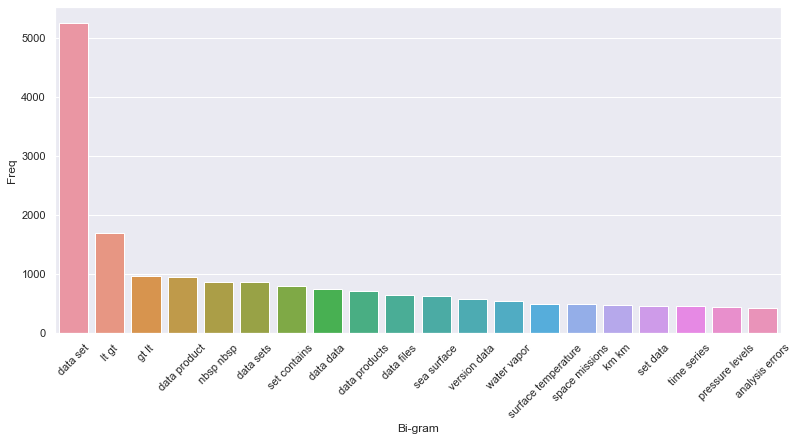

In [0]:
# Most frequently Co-occuring words
def get_top_n2_words(corpus,n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),max_features=2000).fit(df['data_nouns'])
    bag_of_words=vec1.transform(df['data_nouns'])
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word , idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Convert most freq words to datafame for visuals
top2_words = get_top_n2_words(df['data_nouns'], n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ['Bi-gram', 'Freq']

# for bigram wordcloud
top100_words = get_top_n2_words(df['data_nouns'], n=100)
top100_df = pd.DataFrame(top100_words)
top100_df.columns = ['Bi-gram', 'Freq']
print(top2_df)

# barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,6)})
h = sns.barplot(x='Bi-gram', y='Freq', data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)
fig = h.get_figure()
fig.savefig("sns_output_bigrams.png")

### Term vectorization term weighting:

The usefulness of the document-term matrix can be improved by assigning higher weights to important terms. This helps to include or exclude terms that will enter the model. TF-IDF is a common way of giving weights to terms in a document.

Term Frequency - TF is the number of times a term appears in a document.

Inverse Document Frequency - IDF is the total number of documents that have a term. This penalises common terms that appear in almost every document.


In [0]:
no_features = 10000
tfidf_vectorizer = TfidfVectorizer(max_df = 0.95, min_df = 2, stop_words= 'english', max_features=no_features, ngram_range=(1,1),
                                  analyzer='word')
tfidf = tfidf_vectorizer.fit_transform(df['cleaned'])
# get the feature names
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [0]:
print('Vocabulary has %d distinct terms' % len(tfidf_feature_names))

Vocabulary has 10000 distinct terms


In [0]:
import operator
def rank_terms( tfidf, tfidf_feature_names ):
    # get the sums over each column
    sums = tfidf.sum(axis=0)
    # map weights to the terms
    weights = {}
    for col, term in enumerate(tfidf_feature_names):
        weights[term] = sums[0,col]
    # rank the terms by their weight over all documents
    return sorted(weights.items(), key=operator.itemgetter(1), reverse=True)

In [0]:
ranking = rank_terms(tfidf, tfidf_feature_names)
for i, pair in enumerate( ranking[0:20] ):
    print( "%02d. %s (%.0f)" % ( i+1, pair[0], pair[1] ) )

01. data (1321)
02. product (552)
03. set (534)
04. mission (500)
05. technology (400)
06. instrument (369)
07. file (368)
08. surface (366)
09. temperature (361)
10. measurement (358)
11. time (352)
12. observation (352)
13. design (345)
14. sensor (320)
15. model (315)
16. material (305)
17. power (299)
18. resolution (294)
19. image (287)
20. performance (286)


## 3. Data Modelling

In [0]:
df.head()

,Doc_Id,description,word_count,data_nouns,cleaned
0,0,bilis Technologies is pleased to propose an i...,104,bilis Technologies motor propulsion solution g...,bilis technology motor propulsion solution gr...
1,1,The PH METEOROLOGICAL DATA product contains pr...,60,PH METEOROLOGICAL DATA product Digital Numbers...,ph meteorological data product digital number...
2,2,ASC has developed non-scanning 3D TM imagers f...,187,ASC TM imagers UAS awareness landing technolog...,asc tm imagers uas awareness landing technolo...
3,3,NET inversion code provides aerosoloptical pro...,80,inversion code properties column diffuse radia...,inversion code property column diffuse radiat...
4,4,This proposal addresses the concept of Collabo...,201,proposal concept Collaborative Outbound Tai in...,proposal concept collaborative outbound tai i...


In [0]:
# Convert to list
data = df.cleaned.values.tolist()
pprint(data[:1])

[' bilis technology motor propulsion solution grain design response '
 'solicitation sample motor design motor safety compleity storability '
 'advantage motor system manufacturing rocket nozzle injector order weight '
 'count innovation propulsion technology variety mission body gravity well']


In [0]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['bilis', 'technology', 'motor', 'propulsion', 'solution', 'grain', 'design', 'response', 'solicitation', 'sample', 'motor', 'design', 'motor', 'safety', 'compleity', 'storability', 'advantage', 'motor', 'system', 'manufacturing', 'rocket', 'nozzle', 'injector', 'order', 'weight', 'count', 'innovation', 'propulsion', 'technology', 'variety', 'mission', 'body', 'gravity', 'well']]


In [0]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['bilis', 'technology', 'motor', 'propulsion', 'solution', 'grain', 'design', 'response', 'solicitation', 'sample', 'motor', 'design', 'motor', 'safety', 'compleity', 'storability', 'advantage', 'motor', 'system', 'manufacturing', 'rocket', 'nozzle', 'injector', 'order', 'weight', 'count', 'innovation', 'propulsion', 'technology', 'variety', 'mission', 'body', 'gravity', 'well']


### Remove Stopwords, Make Bigrams and Lemmatize

The bigrams model is ready. Let’s define the functions to remove the stopwords, make bigrams and lemmatization and call them sequentially.


In [0]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

### Create the Dictionary and Corpus needed for Topic Modeling

The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus. Let’s create them.


In [0]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['motor', 'propulsion', 'solution', 'grain', 'motor', 'storability', 'advantage', 'motor', 'system', 'manufacturing', 'rocket', 'nozzle', 'injector', 'order', 'weight', 'variety', 'mission', 'body', 'gravity', 'well']]


Create the Dictionary and Corpus needed for Topic Modeling

The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus. Let’s create them.


In [0]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 3), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]]


Gensim creates a unique id for each word in the document. The produced corpus shown above is a mapping of (word_id, word_frequency).

For example, (0, 1) above implies, word id 0 occurs once in the first document. Likewise, word id 1 occurs twice and so on.

This is used as the input by the LDA model.

If you want to see what word a given id corresponds to, pass the id as a key to the dictionary.


In [0]:
id2word[0]

'advantage'

In [0]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('advantage', 1),
  ('body', 1),
  ('grain', 1),
  ('gravity', 1),
  ('injector', 1),
  ('manufacturing', 1),
  ('mission', 1),
  ('motor', 3),
  ('nozzle', 1),
  ('order', 1),
  ('propulsion', 1),
  ('rocket', 1),
  ('solution', 1),
  ('storability', 1),
  ('system', 1),
  ('variety', 1),
  ('weight', 1),
  ('well', 1)]]

### Building the Topic Model

#### 1. LDA model

We have everything required to train the LDA model. In addition to the corpus and dictionary, you need to provide the number of topics as well.

Apart from that, alpha and eta are hyperparameters that affect sparsity of the topics. According to the Gensim docs, both defaults to 1.0/num_topics prior.

chunksize is the number of documents to be used in each training chunk. update_every determines how often the model parameters should be updated and passes is the total number of training passes.


In [0]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
 
NUM_TOPICS = 10
 
vectorizer = CountVectorizer(min_df=5, max_df=0.9, 
                             stop_words='english', lowercase=True, 
                             token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
data_vectorized = vectorizer.fit_transform(df['cleaned'])
 


In [0]:
# Build a Non-Negative Matrix Factorization Model
nmf_model = NMF(n_components=NUM_TOPICS)
nmf_Z = nmf_model.fit_transform(data_vectorized)
print(nmf_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)

(24356, 10)


In [0]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

 View the topics in LDA model

The above LDA model is built with 20 different topics where each topic is a combination of keywords and each keyword contributes a certain weightage to the topic.

You can see the keywords for each topic and the weightage(importance) of each keyword using lda_model.print_topics() as shown next.

In [0]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.019*"technology" + 0.015*"material" + 0.014*"performance" + '
  '0.013*"design" + 0.013*"temperature" + 0.012*"system" + 0.011*"sensor" + '
  '0.011*"power" + 0.010*"mission" + 0.009*"space"'),
 (1,
  '0.090*"datum" + 0.043*"set" + 0.024*"image" + 0.022*"instrument" + '
  '0.020*"mission" + 0.019*"time" + 0.018*"data" + 0.017*"product" + '
  '0.016*"satellite" + 0.014*"file"'),
 (2,
  '0.026*"nbsp" + 0.021*"model" + 0.015*"flight" + 0.014*"tool" + '
  '0.014*"software" + 0.011*"system" + 0.010*"aircraft" + 0.008*"test" + '
  '0.008*"time" + 0.008*"capability"')]


How to interpret this?

Topic 0 is a represented as '0.101*"management" + 0.092*"heat" + 0.080*"fluid" + 0.066*"advantage" + '
  '0.063*"transfer" + 0.056*"behavior" + 0.055*"actuator" + 0.052*"stability" '
  '+ 0.035*"investigation" + 0.030*"removal"'.

It means the top 10 keywords that contribute to this topic are: ‘management’, ‘heat’, ‘fluid’.. and so on and the weight of ‘management’ on topic 0 is 0.101.

The weights reflect how important a keyword is to that topic.

Looking at these keywords, we can guess what this topic could be.

Likewise, can you go through the remaining topic keywords and judge what the topic is?

Compute Model Perplexity and Coherence Score

Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is. In my experience, topic coherence score, in particular, has been more helpful.

In [0]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.146384713240863

Coherence Score:  0.5324433813613786


In [0]:
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [0]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, texts=data_lemmatized, start=1, limit=6, step=1)

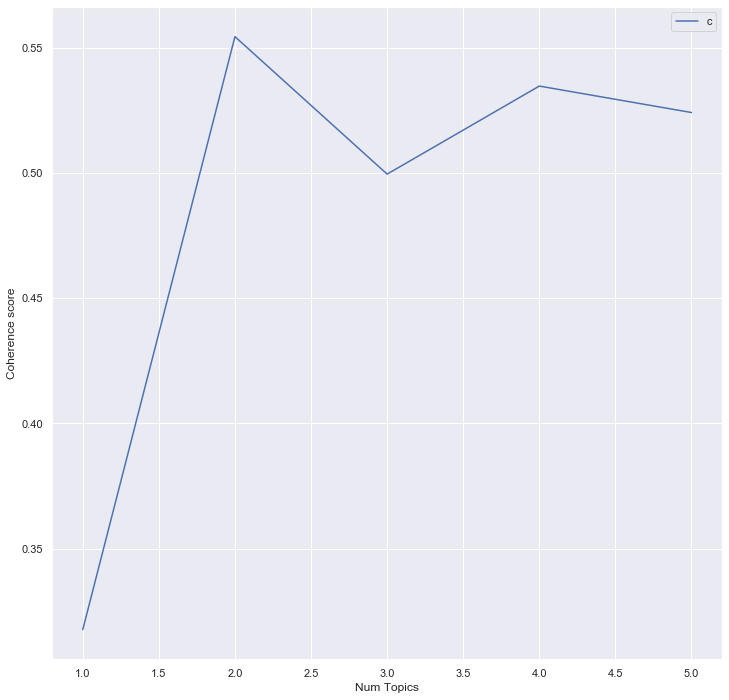

In [0]:
limit=6; start=1; step=1;
x = range(start, limit, step)
plt.figure(figsize=(12,12))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [0]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.3176
Num Topics = 2  has Coherence Value of 0.5544
Num Topics = 3  has Coherence Value of 0.4995
Num Topics = 4  has Coherence Value of 0.5347
Num Topics = 5  has Coherence Value of 0.5241


In [0]:
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.015*"water" + 0.015*"temperature" + 0.014*"datum" + 0.013*"instrument" + '
  '0.010*"surface" + 0.009*"mission" + 0.008*"measurement" + 0.008*"energy" + '
  '0.008*"cell" + 0.008*"model"'),
 (1,
  '0.073*"datum" + 0.037*"product" + 0.032*"set" + 0.025*"observation" + '
  '0.023*"file" + 0.016*"time" + 0.016*"image" + 0.015*"data" + '
  '0.015*"information" + 0.012*"surface"'),
 (2,
  '0.017*"technology" + 0.014*"design" + 0.014*"performance" + 0.013*"system" '
  '+ 0.010*"mission" + 0.010*"material" + 0.009*"sensor" + 0.008*"application" '
  '+ 0.008*"space" + 0.008*"test"')]


In [0]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.9630,"technology, design, performance, system, missi...",bilis technology motor propulsion solution gr...
1,1,1.0,0.8320,"datum, product, set, observation, file, time, ...",ph meteorological data product digital number...
2,2,2.0,0.7694,"technology, design, performance, system, missi...",asc tm imagers uas awareness landing technolo...
3,3,1.0,0.9459,"datum, product, set, observation, file, time, ...",inversion code property column diffuse radiat...
4,4,2.0,0.9871,"technology, design, performance, system, missi...",proposal concept collaborative outbound tai i...
5,5,2.0,0.7226,"technology, design, performance, system, missi...",plan space eploration building pad rocket bla...
6,6,2.0,0.6545,"technology, design, performance, system, missi...",proposal impedance miniaturebandpass rf frequ...
7,7,0.0,0.5445,"water, temperature, datum, instrument, surface...",investigation development spacecraft system s...
8,8,0.0,0.5224,"water, temperature, datum, instrument, surface...",objective eperience space development life su...
9,9,0.0,0.5380,"water, temperature, datum, instrument, surface...",generation observation mission calorimeter en...


How to find the optimal number of topics for LDA?
My approach to finding the optimal number of topics is to build many LDA models with different values of number of topics (k) and pick the one that gives the highest coherence value.

Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics.

If you see the same keywords being repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.

The compute_coherence_values() (see below) trains multiple LDA models and provides the models and their corresponding coherence scores.

If the coherence score seems to keep increasing, it may make better sense to pick the model that gave the highest CV before flattening out. This is exactly the case here.

So for further steps I will choose the model with 20 topics itself.

Visualize the topics-keywords

Now that the LDA model is built, the next step is to examine the produced topics and the associated keywords. There is no better tool than pyLDAvis package’s interactive chart and is designed to work well with jupyter notebooks.


In [0]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.308683  0.207942       1        1  28.656546
17     0.167039  0.278595       2        1   8.619873
9      0.071017 -0.037011       3        1   7.274952
4      0.176360 -0.229285       4        1   7.266849
2      0.167936 -0.202782       5        1   6.778239
10     0.058248 -0.063703       6        1   5.620108
6     -0.029961 -0.021911       7        1   4.601712
14     0.028079 -0.061633       8        1   3.956370
8      0.024369 -0.081246       9        1   3.874359
3     -0.005212 -0.053685      10        1   3.402003
1     -0.084553  0.023389      11        1   2.781692
11    -0.081696  0.050319      12        1   2.430793
19    -0.075003 -0.019219      13        1   2.288992
7     -0.094642  0.025842      14        1   2.223175
0     -0.073591  0.020461      15        1   2.108974
13    -0.073519  0.020413      16        1   2.069590
5     -0.078786  0.044723      17        1   1.885298
16    -0.154823  0.035460      18        1   1.438583
15    -0.108267  0.028886      19        1   1.371762
18    -0.141676  0.034447      20        1   1.350135, topic_info=     Category          Freq         Term         Total  loglift  logprob
20    Default  18112.000000        datum  18112.000000  30.0000  30.0000
30    Default  10130.000000  temperature  10130.000000  29.0000  29.0000
123   Default   7235.000000     material   7235.000000  28.0000  28.0000
142   Default   5890.000000   spacecraft   5890.000000  27.0000  27.0000
97    Default   8222.000000         time   8222.000000  26.0000  26.0000
...       ...           ...          ...           ...      ...      ...
2881  Topic20      0.072065   epectation      1.329715   1.3898 -11.8876
2168  Topic20      0.072065          cgn      1.329714   1.3898 -11.8876
1811  Topic20      0.072068   background      1.329782   1.3898 -11.8876
1397  Topic20      0.072068       domain      1.329818   1.3898 -11.8876
1219  Topic20      0.072069       impact      1.330104   1.3896 -11.8876

[681 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
1020     11  0.946661      absolute
782       7  0.999059        access
952      13  0.968806  accumulation
726       3  0.999163      accuracy
442      20  0.988933      acoustic
...     ...       ...           ...
279      20  0.997608          wing
423       4  0.997599          wire
694       1  0.999483          work
655       3  0.999238          year
608       9  0.995608         yield

[564 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 18, 10, 5, 3, 11, 7, 15, 9, 4, 2, 12, 20, 8, 1, 14, 6, 17, 16, 19])

Finding the dominant topic in each sentence
One of the practical application of topic modeling is to determine what topic a given document is about.

To find that, we find the topic number that has the highest percentage contribution in that document.

The format_topics_sentences() function below nicely aggregates this information in a presentable table.

Find the most representative document for each topic
Sometimes just the topic keywords may not be enough to make sense of what a topic is about. So, to help with understanding the topic, you can find the documents a given topic has contributed to the most and infer the topic by reading that document. Whew!!

The tabular output above actually has 20 rows, one each for a topic. It has the topic number, the keywords, and the most representative document. The Perc_Contribution column is nothing but the percentage contribution of the topic in the given document.

20. Topic distribution across documents
Finally, we want to understand the volume and distribution of topics in order to judge how widely it was discussed. The below table exposes that information.

In [0]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,2.0,"technology, design, performance, system, missi...",5845.0,0.2400
1.0,1.0,"datum, product, set, observation, file, time, ...",8065.0,0.3311
2.0,2.0,"technology, design, performance, system, missi...",10446.0,0.4289
3.0,1.0,"datum, product, set, observation, file, time, ...",NaN,NaN
4.0,2.0,"technology, design, performance, system, missi...",NaN,NaN
...,...,...,...,...
24351.0,2.0,"technology, design, performance, system, missi...",NaN,NaN
24352.0,1.0,"datum, product, set, observation, file, time, ...",NaN,NaN
24353.0,2.0,"technology, design, performance, system, missi...",NaN,NaN
24354.0,1.0,"datum, product, set, observation, file, time, ...",NaN,NaN


#### 2. Topic modeling with LSI

This is a useful topic modeling algorithm in that it can rank topics by itself. Thus it outputs topics in a ranked order. However it does require a num_topics parameter (set to 200 by default) to determine the number of latent dimensions after the SVD.


In [0]:
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=id2word)

In [0]:
lsimodel.show_topics(num_topics=6)  # Showing only the top 5 topics

[(0,
  '0.407*"datum" + 0.351*"nbsp" + 0.266*"product" + 0.206*"observation" + 0.171*"mission" + 0.160*"set" + 0.153*"technology" + 0.143*"temperature" + 0.142*"surface" + 0.140*"time"'),
 (1,
  '0.757*"nbsp" + -0.323*"datum" + -0.291*"product" + -0.249*"observation" + -0.152*"file" + -0.146*"set" + 0.089*"design" + 0.085*"technology" + -0.068*"survey" + -0.066*"information"'),
 (2,
  '-0.534*"nbsp" + 0.258*"technology" + -0.256*"observation" + -0.223*"product" + 0.191*"system" + 0.176*"performance" + 0.172*"design" + -0.160*"datum" + 0.159*"mission" + 0.153*"material"'),
 (3,
  '0.601*"observation" + -0.586*"datum" + 0.214*"analysis" + -0.175*"set" + 0.150*"error" + 0.149*"level" + 0.141*"survey" + 0.131*"pressure" + 0.103*"product" + 0.086*"assimilation"'),
 (4,
  '0.554*"product" + -0.342*"observation" + -0.315*"analysis" + -0.284*"datum" + 0.226*"temperature" + 0.202*"surface" + -0.163*"set" + -0.160*"instrument" + -0.140*"error" + 0.138*"pressure"'),
 (5,
  '0.561*"temperature" + 

In [0]:
lsitopics = lsimodel.show_topics(formatted=False)
lsitopics

[(0,
  [('datum', 0.40716350364201515),
   ('nbsp', 0.3506439005490263),
   ('product', 0.2664449317831131),
   ('observation', 0.20575953336807012),
   ('mission', 0.17092357378913114),
   ('set', 0.1595203421813094),
   ('technology', 0.153496015650872),
   ('temperature', 0.14252833897993256),
   ('surface', 0.14221489120003816),
   ('time', 0.1401813511233511)]),
 (1,
  [('nbsp', 0.7570636545277211),
   ('datum', -0.3225659451648506),
   ('product', -0.2907046178988203),
   ('observation', -0.24869427460214463),
   ('file', -0.15221543841298812),
   ('set', -0.14629583372725666),
   ('design', 0.08938463720691237),
   ('technology', 0.0849029259556698),
   ('survey', -0.06822797535441015),
   ('information', -0.06615239707966454)]),
 (2,
  [('nbsp', -0.534441645429847),
   ('technology', 0.2582652558980328),
   ('observation', -0.2557332289751957),
   ('product', -0.22338941576601268),
   ('system', 0.1912850512491037),
   ('performance', 0.1756583043195039),
   ('design', 0.172170

In [0]:
# Compute Coherence Score
coherence_model_lsi = CoherenceModel(model=lsimodel, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lsi = coherence_model_lsi.get_coherence()
print('\nCoherence Score: ', coherence_lsi)


Coherence Score:  0.43548814034118133


#### 3. Topic modeling with HDP¶

An HDP model is fully unsupervised. It can also determine the ideal number of topics it needs through posterior inference.


In [0]:
hdpmodel = HdpModel(corpus=corpus, id2word=id2word)

In [0]:
hdpmodel.show_topics()

[(0,
  '0.012*technology + 0.010*system + 0.009*design + 0.009*mission + 0.009*performance + 0.008*datum + 0.008*material + 0.008*temperature + 0.007*sensor + 0.007*model + 0.007*space + 0.007*nbsp + 0.006*power + 0.006*application + 0.006*time + 0.006*process + 0.005*test + 0.005*flight + 0.005*use + 0.005*surface'),
 (1,
  '0.035*datum + 0.030*product + 0.025*observation + 0.014*file + 0.014*set + 0.010*instrument + 0.010*surface + 0.010*analysis + 0.009*time + 0.009*data + 0.008*temperature + 0.008*information + 0.007*mission + 0.007*level + 0.006*resolution + 0.006*error + 0.006*orbit + 0.005*satellite + 0.005*sensor + 0.005*image'),
 (2,
  '0.015*datum + 0.010*technology + 0.009*mission + 0.008*product + 0.008*system + 0.007*design + 0.007*performance + 0.007*temperature + 0.006*time + 0.006*material + 0.006*surface + 0.006*model + 0.005*space + 0.005*process + 0.005*set + 0.005*sensor + 0.005*application + 0.005*use + 0.004*power + 0.004*file'),
 (3,
  '0.032*datum + 0.015*produc

In [0]:
hdptopics = hdpmodel.show_topics(formatted=False)
hdptopics

[(0,
  [('technology', 0.012428416147144706),
   ('system', 0.009915659814634851),
   ('design', 0.009456031527366425),
   ('mission', 0.009406645803848271),
   ('performance', 0.00888672289727726),
   ('datum', 0.008485233235916644),
   ('material', 0.007822094304379917),
   ('temperature', 0.007615217596581197),
   ('sensor', 0.0072011784715480046),
   ('model', 0.0070636809983447265),
   ('space', 0.006634290179816059),
   ('nbsp', 0.006595771981567969),
   ('power', 0.006284134602206812),
   ('application', 0.006208282770836645),
   ('time', 0.005987099747440655),
   ('process', 0.005663974240371439),
   ('test', 0.005451081331936331),
   ('flight', 0.005385158941303163),
   ('use', 0.005069149906772312),
   ('surface', 0.005049405188232051)]),
 (1,
  [('datum', 0.03454769544343014),
   ('product', 0.029605984970980544),
   ('observation', 0.025379209843543842),
   ('file', 0.014197342826227704),
   ('set', 0.013879272104525735),
   ('instrument', 0.009794686992591225),
   ('surfac

In [0]:
# Compute Coherence Score
coherence_model_hdp = CoherenceModel(model=hdpmodel, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_hdp = coherence_model_hdp.get_coherence()
print('\nCoherence Score: ', coherence_hdp)


Coherence Score:  0.5067771927334542


#### 4. Nonnegative Double Singular Value Decomposition
Nonnegative Double Singular Value Decomposition (NNDSVD)  is a new method designed to enhance the initialization stage of the nonnegative matrix factorization. The basic algorithm contains no randomization and is based on two SVD processes, one approximating the data matrix, the other approximating positive sections of the resulting partial SVD factors utilizing an algebraic property of unit rank matrices.


##### Selecting the number of topics with Topic Coherence
Topic Modelling algortihms require the number of topics as a parameter. However, we do not know the correct value a priori since it is an unsupervised technique and we do not have labels. To pick the value for the number of topics we can use several heuristics, such as Topic Coherence, used in (https://www.insight-centre.org/sites/default/files/publications/15.010_eswa2014_final_submit.pdf and https://github.com/derekgreene/topic-model-tutorial)

The Topic Coherence-Word2Vec (TC-W2V) metric measures the coherence between words assigned to a topic, i.e.: how semantically close are the words that describe a topic. We can train a Word2Vec model on our collection of documents that will organise the words in a n-dimensional space where semantically similar words are close to each other. The TC-W2V for a topic will be the average similarity between all pairs of the top-n words describing the topic (we define similarity to be 1 when the distance between the words in the n-dimensional space is 0). We then train an NMF model for different values of the number of topics (k) and for each we calculate the average TC-W2V across all topics. The k with the highest average TC-W2V is used to train a final NMF model.

##### Preparing the data
Scikit-learn has a simple and fast implementation of NMF that we can use. The input to the model are tf-idf vectors from the corpus. Using tf-idf vector allows us to penalise common words that are in every document and favour words that are less common and more descriptive. For more on tf-idf check http://www.tfidf.com/ In this process we also remove stopwords, which are common words that do not provide any meaning such as a, the, but, etc.

In [0]:
no_topics = 4
nmf=NMF(n_components = no_topics, random_state =1, alpha=0.1, l1_ratio = 0.5, init= 'nndsvd').fit(tfidf)

In [0]:
def display_topics(model, feature_names, no_top_words):
    col1 = 'topic'
    col2 = 'top_ten_words'
    dct = {col1: [], col2: []}
    for topic_idx, topic in enumerate(model.components_):
        dct[col1].append(str(topic_idx))
        dct[col2].append(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
    return pd.DataFrame.from_dict(dct)

In [0]:
no_top_words = 10
topic_word = display_topics(nmf, tfidf_feature_names, no_top_words)
topic_word

,topic,top_ten_words
0,0,data set contains phase file mission image ins...
1,1,technology design power material mission space...
2,2,product km data surface band resolution day sa...
3,3,observation analysis merra error background in...


In [0]:
no_top_words = 3
topic_word_3 = display_topics(nmf, tfidf_feature_names, no_top_words)
topic_word_3['Theme'] = topic_word_3.top_ten_words.str.title()
topic_word_4 = topic_word_3.loc[:,['topic', 'Theme']]
topic_word_4

,topic,Theme
0,0,Data Set Contains
1,1,Technology Design Power
2,2,Product Km Data
3,3,Observation Analysis Merra


In [0]:
# Merge the theme with the top_ten
topic_word = pd.merge(topic_word_4, topic_word, on ='topic')
topic_word

,topic,Theme,top_ten_words
0,0,Data Set Contains,data set contains phase file mission image ins...
1,1,Technology Design Power,technology design power material mission space...
2,2,Product Km Data,product km data surface band resolution day sa...
3,3,Observation Analysis Merra,observation analysis merra error background in...


In [0]:
nmf_W = nmf.transform(tfidf)
nmf_H = nmf.components_

In [0]:
df2 = pd.DataFrame({'topic': nmf_W.argmax(axis=1),
                   'Doc_Id': df['Doc_Id'],
                   'description': df['description']},
                  columns = ['topic', 'Doc_Id', 'description'])

In [0]:
def showdocs(df2, topics, nshow=5 ): # nshow= len(df1)
    idx = df2.topic == topics[0]
    for i in range(1, len(topics)):
        idx = idx | (df2.topic == topics[i])
    return df2[idx].groupby('topic').head(nshow).sort_values('topic')

In [0]:
numbers = tuple(list(range(0, no_topics)))
final = showdocs(df2, numbers)
final.head(10)

,topic,Doc_Id,description
28,0,28,This data set includes Voyager 2 encounter ma...
1,0,1,The PH METEOROLOGICAL DATA product contains pr...
36,0,36,Reducing Symptomatology of ation Syndrome thr...
27,0,27,This data set contains data taken by the Stu...
12,0,12,nan
6,1,6,This proposal is submitted for developing low ...
0,1,0,bilis Technologies is pleased to propose an i...
4,1,4,This proposal addresses the concept of Collabo...
2,1,2,ASC has developed non-scanning 3D TM imagers f...
5,1,5,Current plans for deep space eploration includ...


In [0]:
topic_word['topic']=pd.to_numeric(topic_word['topic'])
topic_body_2 =pd.merge(topic_word, final,on='topic')
topic_body_2

,topic,Theme,top_ten_words,Doc_Id,description
0,0,Data Set Contains,data set contains phase file mission image ins...,28,This data set includes Voyager 2 encounter ma...
1,0,Data Set Contains,data set contains phase file mission image ins...,1,The PH METEOROLOGICAL DATA product contains pr...
2,0,Data Set Contains,data set contains phase file mission image ins...,36,Reducing Symptomatology of ation Syndrome thr...
3,0,Data Set Contains,data set contains phase file mission image ins...,27,This data set contains data taken by the Stu...
4,0,Data Set Contains,data set contains phase file mission image ins...,12,nan
5,1,Technology Design Power,technology design power material mission space...,6,This proposal is submitted for developing low ...
6,1,Technology Design Power,technology design power material mission space...,0,bilis Technologies is pleased to propose an i...
7,1,Technology Design Power,technology design power material mission space...,4,This proposal addresses the concept of Collabo...
8,1,Technology Design Power,technology design power material mission space...,2,ASC has developed non-scanning 3D TM imagers f...
9,1,Technology Design Power,technology design power material mission space...,5,Current plans for deep space eploration includ...


In [0]:
topic_body_3 = pd.merge(topic_body_2, df, on='Doc_Id')
topic_body_3.head()

,topic,Theme,top_ten_words,Doc_Id,description_x,description_y,word_count,data_nouns,cleaned
0,0,Data Set Product,data set product file observation instrument k...,1,The PH METEOROLOGICAL DATA product contains pr...,The PH METEOROLOGICAL DATA product contains pr...,60,PH METEOROLOGICAL DATA product Digital Numbers...,ph meteorological data product digital number...
1,0,Data Set Product,data set product file observation instrument k...,3,NET inversion code provides aerosoloptical pro...,NET inversion code provides aerosoloptical pro...,80,inversion code properties column diffuse radia...,inversion code property column diffuse radiat...
2,0,Data Set Product,data set product file observation instrument k...,12,nan,nan,1,nan,nan
3,0,Data Set Product,data set product file observation instrument k...,27,This data set contains data taken by the Stu...,This data set contains data taken by the Stu...,20,data set contains data Student Dust Counter in...,data set contains data student dust counter i...
4,0,Data Set Product,data set product file observation instrument k...,28,This data set includes Voyager 2 encounter ma...,This data set includes Voyager 2 encounter ma...,215,data set Voyager encounter magnetometer data s...,data set voyager encounter magnetometer data ...


Based on the models

Conclusion
We started with understanding what topic modeling can do. We built a basic topic model using Gensim’s LDA and visualize the topics using pyLDAvis. Then we built mallet’s LDA implementation. You saw how to find the optimal number of topics using coherence scores and how you can come to a logical understanding of how to choose the optimal model.

Finally we saw how to aggregate and present the results to generate insights that may be in a more actionable.

Hope you enjoyed reading this. I would appreciate if you leave your thoughts in the comments section below.

Edit: I see some of you are experiencing errors while using the LDA Mallet and I don’t have a solution for some of the issues. So, I’ve implemented a workaround and more useful topic model visualizations. Hope you will find it helpful.